# 0. MLP for regression (*)

We will continue with the dataset that we used in the lecture with predicting miles per gallons using an MLP for regression.

  a) Load the mpg dataset using seaborn. (*)

  b) Use your data analysis skills to perform EDA. (*)

  c) Find out the missing values in the dataset and use a machine learning model to fill them in (imputation). (**)

  d) Can you figure out a way to see if the values filled in are reasonable? (**)

  e) Do a train|val|test split on the data and scale it properly. Test out which scaling method to use. (*)

  f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

  g) Now use early stopping to tune the number of epochs. (*)

  h) Train on all training data and validation data. (*)

  i) Predict on test data and evaluate. (*)

  j) Can you create an MLP model that beats random forest for this dataset? (**)


In [44]:
import seaborn as sns 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import MinMaxScaler

a) Load the mpg dataset

In [2]:
df = sns.load_dataset("mpg").drop("name", axis = 1)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


b) Data analysis

In [4]:
df.info()
# 6 entries missing on the horspower column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


c) Filling missing data with a machine learning algorithm

In [39]:
train = df[df["horsepower"].notnull()]
test = df[df["horsepower"].isnull()]

X_train,y_train = train.drop(["horsepower","origin"],axis=1),train[["horsepower"]]
X_test,y_test = test.drop(["horsepower","origin"],axis=1),test[["horsepower"]]

model = DecisionTreeRegressor()
model.fit(X_train,y_train) 

y_pred = model.predict(X_test)

test["horsepower"] = y_pred
filled_df = pd.concat([train,test],ignore_index=True)

filled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_93913/4079115923.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["horsepower"] = y_pred


d) Checking if the predicted data is reasonable

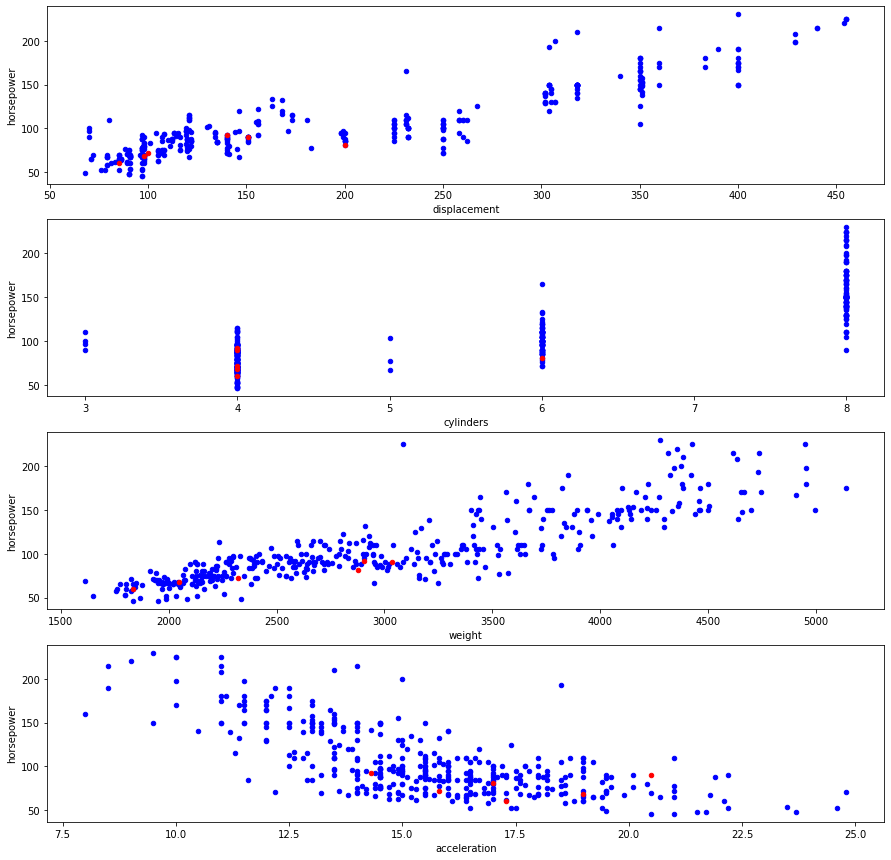

In [53]:
fig,ax = plt.subplots(4,1,figsize=(15,15))

for i,feature in enumerate(["displacement","cylinders","weight","acceleration"]):
    train.plot(kind ="scatter",x=feature,y="horsepower",color="blue",ax=ax[i])
    test.plot(kind ="scatter",x=feature,y="horsepower",color="red",ax=ax[i])

 e) Do a train|val|test split on the data and scale it properly. Test out which scaling method to use. (*)

In [166]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split  

#dropping the origin 
df = filled_df.drop("origin",axis=1)

# Train,Val,Test split
X_train,X_test,y_train,y_test = train_test_split(df.drop("mpg",axis=1),df[["mpg"]],test_size=0.3, random_state=42)

#scaling the data both methods
std_scaler = StandardScaler() 
mm_scaler = MinMaxScaler() 

std_scaler.fit(X_train)
mm_scaler.fit(X_train)

std_scaled_X_train = std_scaler.transform(X_train)
std_scaled_X_test = std_scaler.transform(X_test)

mm_scaled_X_train = mm_scaler.transform(X_train)
mm_scaled_X_test = mm_scaler.transform(X_test)


 f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)



In [94]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD

def MLP(n,n_nodes):
    model = Sequential()
    model.add(InputLayer(X_train.shape[1]))
    for x in range(n): 
        model.add(Dense(n_nodes, name = f"Hidden{x}", activation = "relu"))
    model.add(Dense(1, name = "Output_layer")) # note no activation function --> linear activation
    model.compile(loss = "mean_squared_error", optimizer=SGD(learning_rate=.01))
    
    return model


layers_list = [1,2,3] 
n_nodes_list = [32,24,16,10,8,6,4,2]
combinations_list = [f"{a}_{b}" for a in layers_list for b in n_nodes_list]


In [91]:
combinations_list

['1_32',
 '1_24',
 '1_16',
 '1_10',
 '1_8',
 '1_6',
 '1_4',
 '2_32',
 '2_24',
 '2_16',
 '2_10',
 '2_8',
 '2_6',
 '2_4',
 '3_32',
 '3_24',
 '3_16',
 '3_10',
 '3_8',
 '3_6',
 '3_4']

In [95]:
results_df = pd.DataFrame(columns = ["N Layers","N Nodes","Loss","Validation loss"])

for comb in combinations_list:
    n_layers,n_nodes = comb.split("_")
    n_layers,n_nodes = int(n_layers),int(n_nodes)
    print(f"Number of layers = {n_layers} / Number of nodes = {n_nodes}")

    model = MLP(n_layers,n_nodes) 

    model.fit(std_scaled_X_train,y_train, epochs = 100, validation_split=.2, verbose=0)

    loss_df = pd.DataFrame(model.history.history).sort_values(by="val_loss",ascending=True)
    loss_df.reset_index(drop=True,inplace=True)

    loss = loss_df.values[0][0]
    val_loss = loss_df.values[0][1]

    new_line = pd.DataFrame([[n_layers,n_nodes,loss,val_loss]],columns = ["N Layers","N Nodes","Loss","Validation loss"])
    results_df = pd.concat([results_df,new_line],ignore_index=True)
    

Number of layers = 1 / Number of nodes = 32
Number of layers = 1 / Number of nodes = 24
Number of layers = 1 / Number of nodes = 16
Number of layers = 1 / Number of nodes = 10
Number of layers = 1 / Number of nodes = 8
Number of layers = 1 / Number of nodes = 6
Number of layers = 1 / Number of nodes = 4
Number of layers = 1 / Number of nodes = 2
Number of layers = 2 / Number of nodes = 32
Number of layers = 2 / Number of nodes = 24
Number of layers = 2 / Number of nodes = 16
Number of layers = 2 / Number of nodes = 10
Number of layers = 2 / Number of nodes = 8
Number of layers = 2 / Number of nodes = 6
Number of layers = 2 / Number of nodes = 4
Number of layers = 2 / Number of nodes = 2
Number of layers = 3 / Number of nodes = 32
Number of layers = 3 / Number of nodes = 24
Number of layers = 3 / Number of nodes = 16
Number of layers = 3 / Number of nodes = 10
Number of layers = 3 / Number of nodes = 8
Number of layers = 3 / Number of nodes = 6
Number of layers = 3 / Number of nodes = 4

In [136]:
results_df = results_df.sort_values(by=["N Layers","N Nodes"],ascending=True)
results_df 

,N Layers,N Nodes,Loss,Validation loss
7,1,2,8.833972,10.190457
6,1,4,8.739501,9.79635
5,1,6,8.419092,10.380311
4,1,8,7.412102,9.269612
3,1,10,7.960434,10.340009
2,1,16,8.798943,9.869271
1,1,24,7.157798,9.40877
0,1,32,8.874316,10.046226
15,2,2,60.172188,66.479668
14,2,4,7.888144,11.09722


<AxesSubplot:xlabel='N Nodes', ylabel='Validation loss'>

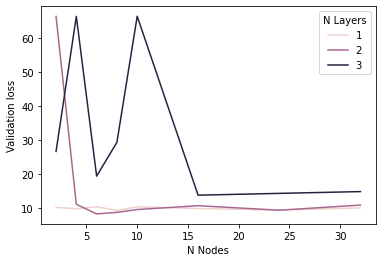

In [146]:
plot_df = result_df.drop("Loss",axis=1)

sns.lineplot(data=plot_df,x="N Nodes",y="Validation loss",hue="N Layers")

  g) Now use early stopping to tune the number of epochs. (*)



In [184]:
import tensorflow as tf

model = MLP(2,6) 


callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
history = model.fit(std_scaled_X_train, y_train,
                    epochs=100, batch_size=1, callbacks=[callback],
                    verbose=0)
len(history.history['loss']) 

7

  h) Train on all training data and validation data. (*)



In [239]:
std_model = MLP(2,6)
mm_model = MLP(2,6)
std_model.fit(std_scaled_X_train, y_train,
                    epochs=100, batch_size=20, callbacks=[callback],
                    verbose=0)

mm_model.fit(mm_scaled_X_train, y_train,
                    epochs=7, batch_size=35,
                    verbose=0)

  i) Predict on test data and evaluate. (*)



In [235]:
std_y_pred = std_model.predict(std_scaled_X_test)
mm_y_pred = mm_model.predict(mm_scaled_X_test)

In [236]:
mm_y_pred,std_y_pred

(array([[31.939547],
        [32.97416 ],
        [30.07984 ],
        [32.759087],
        [25.83726 ],
        [27.462181],
        [32.97416 ],
        [25.462069],
        [28.970606],
        [31.168425],
        [26.075983],
        [32.97416 ],
        [32.97416 ],
        [27.523783],
        [30.849367],
        [25.548883],
        [32.97416 ],
        [32.75737 ],
        [28.015112],
        [32.97416 ],
        [32.92972 ],
        [30.729738],
        [32.97416 ],
        [32.97416 ],
        [27.443027],
        [32.97416 ],
        [27.473253],
        [32.97416 ],
        [32.010517],
        [26.669323],
        [32.08528 ],
        [32.97416 ],
        [31.846823],
        [32.97416 ],
        [32.97416 ],
        [32.96952 ],
        [32.97416 ],
        [30.287783],
        [31.323973],
        [32.97416 ],
        [32.97416 ],
        [32.93756 ],
        [32.97416 ],
        [25.914402],
        [32.97416 ],
        [32.97416 ],
        [32.97416 ],
        [32.9

In [238]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

std_mae =  mean_absolute_error(y_test, std_y_pred)
std_mse =  mean_squared_error(y_test, std_y_pred)
std_rmse = sqrt(std_mse)

print("Standardizer - RMSE = ",std_rmse)

mm_mae =  mean_absolute_error(y_test, mm_y_pred)
mm_mse =  mean_squared_error(y_test, mm_y_pred)
mm_rmse = sqrt(mm_mse)

print("MinMaxScaler - RMSE = ",mm_rmse)


Standardizer - RMSE =  3.8859169448609703
MinMaxScaler - RMSE =  10.037126476231787


  j) Can you create an MLP model that beats random forest for this dataset? (**)

In [260]:
from sklearn.ensemble import RandomForestRegressor 
import random

random_forest = RandomForestRegressor() 

random_forest.fit(std_scaled_X_train,np.array(y_train).ravel())

y_pred = random_forest.predict(std_scaled_X_test)

rf_mae =  mean_absolute_error(y_test, y_pred)
rf_mse =  mean_squared_error(y_test, y_pred)
rf_rmse = sqrt(rf_mse)

print("Random Forest - RMSE = ",rf_rmse,"| MAE = ",rf_mae)


std_model = MLP(2,6)
std_model.fit(std_scaled_X_train, y_train,
                    epochs=100, batch_size=15, callbacks=[callback],
                    verbose=0)

std_y_pred = std_model.predict(std_scaled_X_test)

std_mae =  mean_absolute_error(y_test, std_y_pred)
std_mse =  mean_squared_error(y_test, std_y_pred)
std_rmse = sqrt(std_mse)

print("MLP - RMSE = ",min(std_rmse) ,"| MAE = ",min(std_mae))

Random Forest - RMSE =  2.852541039728146 | MAE =  2.1021666666666667
MLP - RMSE =  2.833237677841886 | MAE =  2.1101200437545775
